# Spatial Classification of Crops Using K-Nearest Neighbors

This is a model I've put together to demonstrate KNN at a low-level using Minecraft as a reference point. Not a novel discovery nor something all too impressive, just a tool for a bigger project I'm working on 🙂!

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data.csv')
df.head()

,moisture,elevation,crop
0,4,64,melon
1,5,64,melon
2,4,65,melon
3,4,66,melon
4,5,63,melon


In [6]:
X = df[['moisture', 'elevation']]
y = df['crop']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       melon       1.00      1.00      1.00        12
     pumpkin       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [16]:
new_point = [[3, 74]]
prediction = knn.predict(new_point)
print(f"Predicted crop: {prediction[0]}")

Predicted crop: pumpkin


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


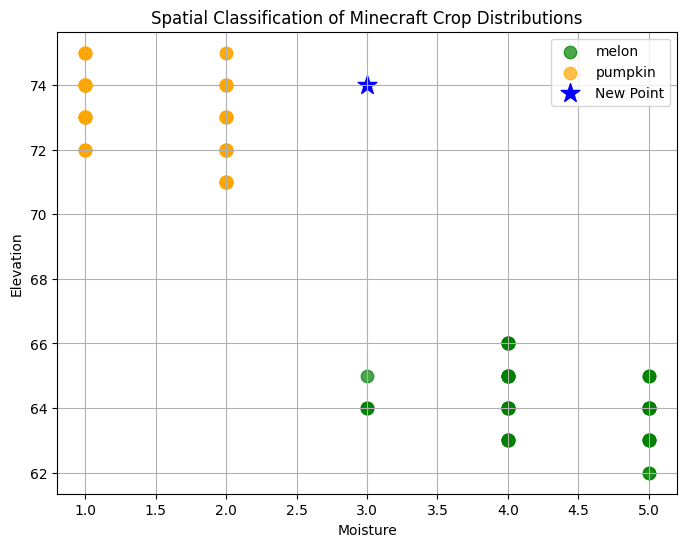

In [14]:
colors = {'melon': 'green', 'pumpkin': 'orange'}
plt.figure(figsize=(8, 6))

for label in df['crop'].unique():
    subset = df[df['crop'] == label]
    plt.scatter(subset['moisture'], subset['elevation'], color=colors[label], label=label, s=80, alpha=0.7)

plt.scatter(new_point[0][0], new_point[0][1], color='blue', marker='*', s=200, label='New Point')

plt.xlabel('Moisture')
plt.ylabel('Elevation')
plt.title('Spatial Classification of Minecraft Crop Distributions')
plt.legend()
plt.grid(True)
plt.show()